<a href="https://colab.research.google.com/github/Adtyra/Portofolio/blob/main/Files/Kesehjatraan_Pekerja/Kesehjatraan_Pekerja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("upah.csv")

# remove string "upah." from header
df.columns = df.columns.str.replace('upah.', '')

# Replace 'NA' with NaN
df.replace('NA', np.nan, inplace=True)

# Melt the dataset to reshape it
df_melted = pd.melt(df, id_vars=['provinsi'], var_name='year', value_name='upah')

# Filter out rows where provinsi is 'INDONESIA'
df_melted = df_melted[df_melted['provinsi'] != 'INDONESIA']

# Convert 'year' column to numeric type
df_melted['year'] = pd.to_numeric(df_melted['year'])

# Drop rows with missing values
df_melted.dropna(inplace=True)

# Sort the DataFrame by 'provinsi' column
df_sorted = df_melted.sort_values(by=['provinsi', 'year'])

# save new csv
df_sorted.to_csv("upah_cleaned.csv", index=False)

<ipython-input-1-b7a9ccbfc08a>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('upah.', '')


In [ ]:
import pandas as pd
import numpy as np

# Load your dataset into a DataFrame
df = pd.read_csv("peng.csv")

# Filter the columns in the header to keep only those containing 'perdesaanperkotaan.total'
filtered_columns = ['provinsi'] + [col for col in df.columns if 'peng.perdesaanperkotaan.total' in col]

# Select only the filtered columns in the DataFrame
df_filtered = df[filtered_columns]

# Remove 'peng.perdesaanperkotaan.total.' from column names and keep only the year
df_filtered.columns = df_filtered.columns.str.replace('peng.perdesaanperkotaan.total.', '')

# Replace 'NA' with NaN
df_filtered.replace('NA', np.nan, inplace=True)

# Melt the dataset to reshape it
df_melted = pd.melt(df_filtered, id_vars=['provinsi'], var_name='year', value_name='pengeluaran')

# Filter out rows where provinsi is 'INDONESIA'
df_melted = df_melted[df_melted['provinsi'] != 'INDONESIA']

# Convert 'year' column to numeric type
df_melted['year'] = pd.to_numeric(df_melted['year'])

# Drop rows with missing values
df_melted.dropna(inplace=True)

# Sort the DataFrame by 'provinsi' column
df_sorted = df_melted.sort_values(by=['provinsi', 'year'])

# save new csv
df_sorted .to_csv("peng_cleaned.csv", index=False)

<ipython-input-2-aee4843faab0>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df_filtered.columns = df_filtered.columns.str.replace('peng.perdesaanperkotaan.total.', '')
<ipython-input-2-aee4843faab0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.replace('NA', np.nan, inplace=True)


In [ ]:
import pandas as pd
import numpy as np

# Load the PENGELUARAN dataset
pengeluaran_df = pd.read_csv('peng_cleaned.csv')

# Sort the DataFrame by 'provinsi' and 'year'
pengeluaran_df_sorted = pengeluaran_df.sort_values(by=['provinsi', 'year'])

# Calculate the absolute difference between consecutive years within each province
pengeluaran_df_sorted['pengeluaran_diff'] = pengeluaran_df_sorted.groupby('provinsi')['pengeluaran'].diff()

# Calculate the percentage difference between consecutive years
pengeluaran_df_sorted['pengeluaran_diff_percent'] = pengeluaran_df_sorted['pengeluaran_diff'] / pengeluaran_df_sorted['pengeluaran'] * 100

# Check if the percentage difference is more than 20% and the absolute difference is more than 500,000
problematic_rows = pengeluaran_df_sorted[(pengeluaran_df_sorted['pengeluaran_diff_percent'].abs() > 20) & (pengeluaran_df_sorted['year'] >= 2014) & (pengeluaran_df_sorted['year'] <= 2022)]

if problematic_rows.empty:
    print("No significant discrepancies found in PENGELUARAN values between consecutive years from 2014 to 2022.")
else:
    print("Significant discrepancies found in PENGELUARAN values between consecutive years from 2014 to 2022:")
    print(problematic_rows)

Significant discrepancies found in PENGELUARAN values between consecutive years from 2014 to 2022:
       provinsi  year  pengeluaran  pengeluaran_diff  pengeluaran_diff_percent
124  JAWA TIMUR  2015     830472.0          170633.0                 20.546508


In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("ump.csv")

# remove string "ump." from header
df.columns = df.columns.str.replace('ump.', '')

# Replace 'NA' with NaN
df.replace('NA', np.nan, inplace=True)

# Melt the dataset to reshape it
df_melted = pd.melt(df, id_vars=['provinsi'], var_name='year', value_name='ump')

# Convert 'year' column to numeric type
df_melted['year'] = pd.to_numeric(df_melted['year'])

# Filter out rows where provinsi is 'INDONESIA'
df_melted = df_melted[df_melted['provinsi'] != 'INDONESIA']

# Drop rows with missing values
df_melted.dropna(inplace=True)

# Sort the DataFrame by 'provinsi' column
df_sorted = df_melted.sort_values(by=['provinsi', 'year'])


# save new csv
df_sorted.to_csv("ump_cleaned.csv", index=False)

<ipython-input-4-aecc5a1acfb3>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('ump.', '')


In [ ]:
import pandas as pd

# Load the UMP dataset
ump_df = pd.read_csv('ump_cleaned.csv')

# Sort the DataFrame by 'provinsi' and 'year'
ump_df_sorted = ump_df.sort_values(by=['provinsi', 'year'])

# Calculate the absolute difference between consecutive years within each province
ump_df_sorted['ump_diff'] = ump_df_sorted.groupby('provinsi')['ump'].diff()

# Calculate the percentage difference between consecutive years
ump_df_sorted['ump_diff_percent'] = ump_df_sorted['ump_diff'] / ump_df_sorted['ump'] * 100

# Check if the percentage difference is more than 22% and the absolute difference is more than 500,000
problematic_rows = ump_df_sorted[(ump_df_sorted['ump_diff_percent'].abs() > 22) & (ump_df_sorted['year'] >= 2015) & (ump_df_sorted['year'] <= 2022)]

if problematic_rows.empty:
    print("No significant discrepancies found in UMP values between consecutive years from 2014 to 2022.")
else:
    print("Significant discrepancies found in UMP values between consecutive years from 2014 to 2022:")
    print(problematic_rows)


Significant discrepancies found in UMP values between consecutive years from 2014 to 2022:
             provinsi  year        ump   ump_diff  ump_diff_percent
61             BANTEN  2021  3230023.0   769026.0         23.808685
62             BANTEN  2022  2501203.0  -728820.0        -29.138778
99      DI YOGYAKARTA  2017  1337645.0   349145.0         26.101469
103     DI YOGYAKARTA  2021  2215000.0   510392.0         23.042528
124       DKI JAKARTA  2021  1765000.0 -2511350.0       -142.286119
125       DKI JAKARTA  2022  4641854.0  2876854.0         61.976400
145         GORONTALO  2021  4416186.0  1627360.0         36.849897
146         GORONTALO  2022  2800580.0 -1615606.0        -57.688265
182        JAWA BARAT  2016  2250000.0  1250000.0         55.555556
183        JAWA BARAT  2017  1420624.0  -829376.0        -58.381106
187        JAWA BARAT  2021  2630162.0   819811.0         31.169601
188        JAWA BARAT  2022  1841487.0  -788675.0        -42.828160
204       JAWA TENGAH  20

2021-2022 gives constant disrepancy, after a cross check with https://databoks.katadata.co.id/datapublish/2021/05/01/upah-minimum-yogyakarta-paling-rendah-di-indonesia-pada-2021
it is concluded every each of 2021 data is wrong and will be switched to the correct data value


In [ ]:
import pandas as pd

# Load the data from a.csv and b.csv
a_df = pd.read_csv('upah-minimum-provinsi-per-bulan-di-indonesia-(2021).csv')
b_df = pd.read_csv('ump_cleaned.csv')

# Remove the '.' from the 'Nilai' column in a_df and convert it to numeric, handling NaN gracefully
a_df['Nilai'] = a_df['Nilai'].str.replace('.', '', regex=False).fillna(0).astype(int)

# Merge the data from a_df to b_df where year is 2021 and provinsi matches nama data
b_df = b_df.merge(a_df[['Nama Data', 'Nilai']], how='left', left_on='provinsi', right_on='Nama Data')

# Replace the 'upah' values with 'Nilai' where year is 2021
b_df.loc[b_df['year'] == 2021, 'ump'] = b_df['Nilai']

# Drop the unnecessary columns
b_df.drop(columns=['Nama Data', 'Nilai'], inplace=True)

# Save the modified b_df to a new CSV file
b_df.to_csv('ump_cleaned_fixed.csv', index=False)

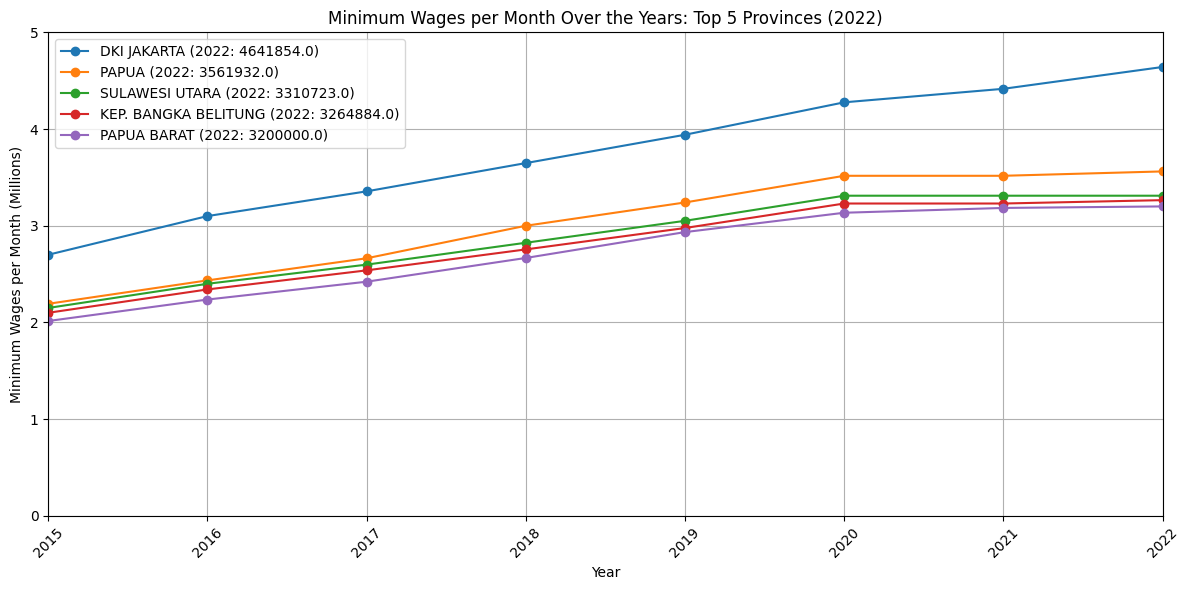

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('ump_cleaned_fixed.csv')

# Pivot the data to have years as columns and provinces as rows
pivot_df = df.pivot(index='provinsi', columns='year', values='ump')

# Get the values of 2022 and sort provinces based on them
ump_2022_values = pivot_df[2022].sort_values(ascending=False)

# Get the top 5 provinces with the highest values in 2022
top_5 = ump_2022_values.head(5)

# Plotting
plt.figure(figsize=(12, 6))

# Plotting top 5 provinces with the highest values in 2022
for province, value in top_5.items():
    plt.plot(pivot_df.columns, pivot_df.loc[province] / 1000000, marker='o', label=f"{province} (2022: {value})")

plt.title('Minimum Wages per Month Over the Years: Top 5 Provinces (2022)')
plt.xlabel('Year')
plt.ylabel('Minimum Wages per Month (Millions)')
plt.xticks(range(2015, 2023), rotation=45)  # Start from year 2015
plt.xlim(2015, 2022)  # Limit the data to start from 2015
plt.legend()
plt.grid(True)

# Set the y-axis limit to 5 million
plt.ylim(0, 5)

plt.tight_layout()

# Show plot
plt.show()

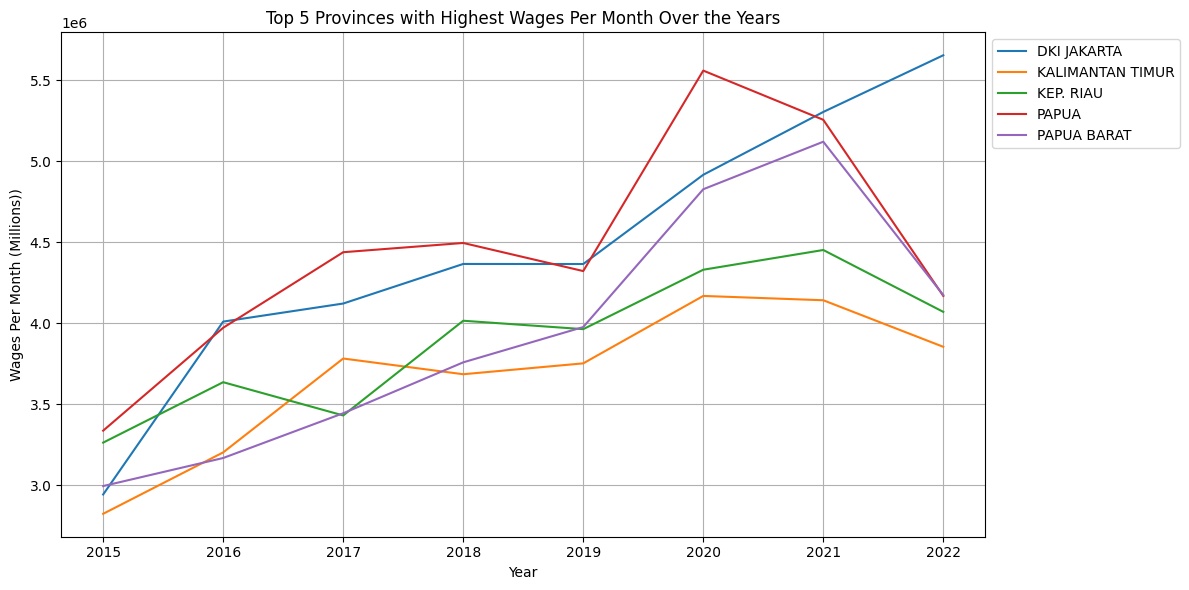

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('upah_cleaned.csv')

# Convert wages from per hour to per month based on 173 hours per month for full-time work
df['upah'] = df['upah'] * 173

# Group the data by province
grouped = df.groupby('provinsi')

# Calculate the mean wages per month for each province
province_mean_wages = grouped['upah'].mean()

# Sort the provinces by mean wages in descending order to find top 5
top_5_provinces = province_mean_wages.nlargest(5)

# Get the data for top 5 highest
top_5_data = df[df['provinsi'].isin(top_5_provinces.index)]

# Step 5: Create line charts for top 5 highest
import matplotlib.pyplot as plt

# Plotting for top 5 highest wages
plt.figure(figsize=(12, 6))
for province, data in top_5_data.groupby('provinsi'):
    plt.plot(data['year'], data['upah'], label=province)
plt.title('Top 5 Provinces with Highest Wages Per Month Over the Years')
plt.xlabel('Year')
plt.ylabel('Wages Per Month (Millions))')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

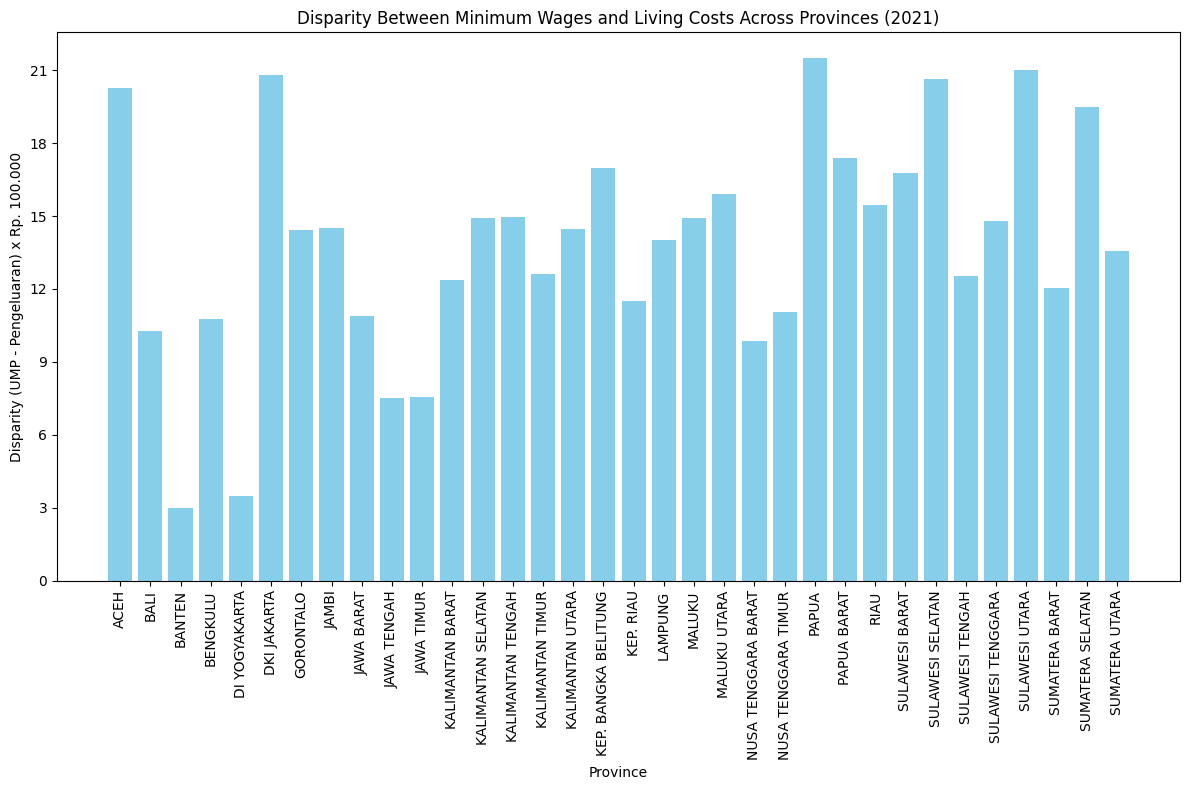

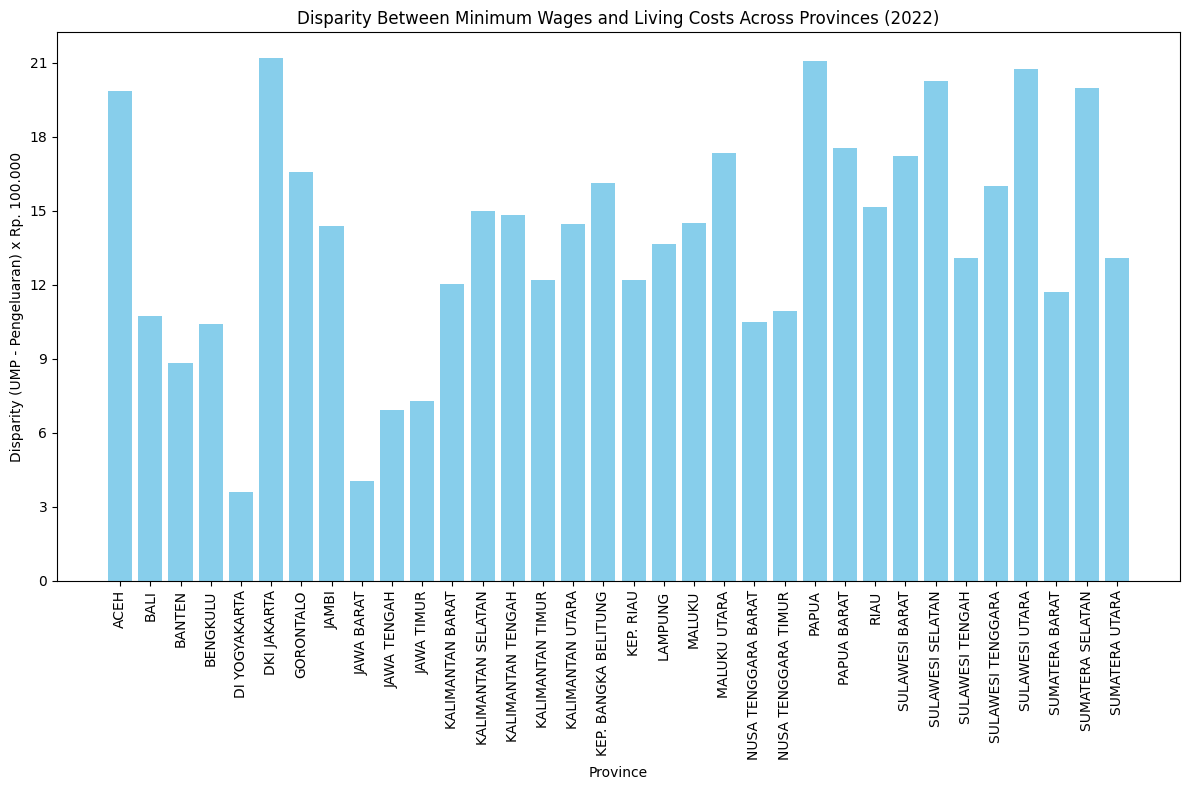

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
ump_df = pd.read_csv('ump_cleaned_fixed.csv')
peng_df = pd.read_csv('peng_cleaned.csv')

# Merge the datasets on 'provinsi' and 'year'
merged_df = pd.merge(ump_df, peng_df, on=['provinsi', 'year'])

# Calculate the disparity between UMP and Pengeluaran
merged_df['disparity'] = merged_df['ump'] - merged_df['pengeluaran']

# Filter the data for the years 2020, 2021, and 2022
years = [2021, 2022]
filtered_df = merged_df[merged_df['year'].isin(years)]

# Group by 'provinsi' and 'year' and calculate the mean disparity
mean_disparity = filtered_df.groupby(['provinsi', 'year'])['disparity'].mean().reset_index()

# Plot separate bar charts for each year
for year in years:
    year_data = mean_disparity[mean_disparity['year'] == year]
    plt.figure(figsize=(12, 8))
    plt.bar(year_data['provinsi'], year_data['disparity'], color='skyblue')
    plt.xlabel('Province')
    plt.ylabel('Disparity (UMP - Pengeluaran) x Rp. 100.000')
    plt.title(f'Disparity Between Minimum Wages and Living Costs Across Provinces ({year})')
    plt.xticks(rotation=90)

    # Set y-axis ticks at intervals of 300,000 and customize labels
    y_ticks = range(0, int(max(mean_disparity['disparity']))+1, 300000)
    y_tick_labels = [f'{tick/100000:.0f}' for tick in y_ticks]
    plt.yticks(y_ticks, y_tick_labels)

    plt.tight_layout()
    plt.show()


<ipython-input-15-266b8b8a0911>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100


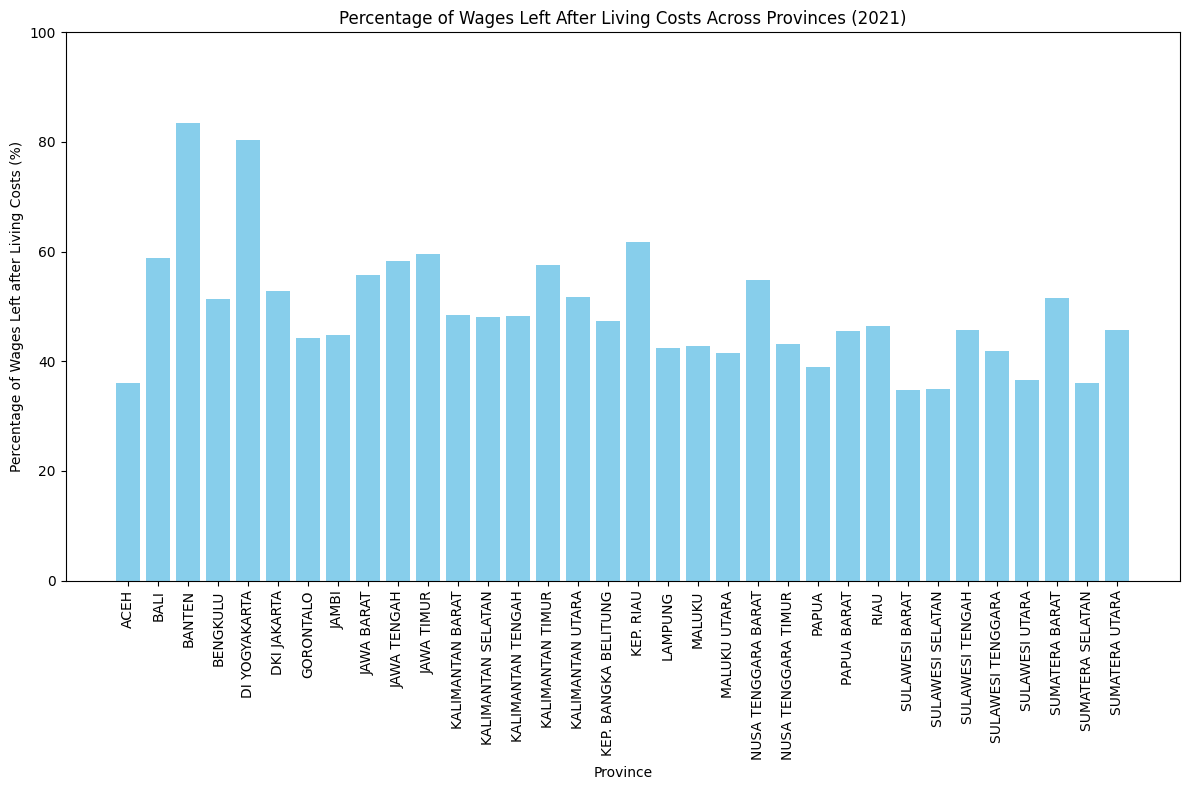

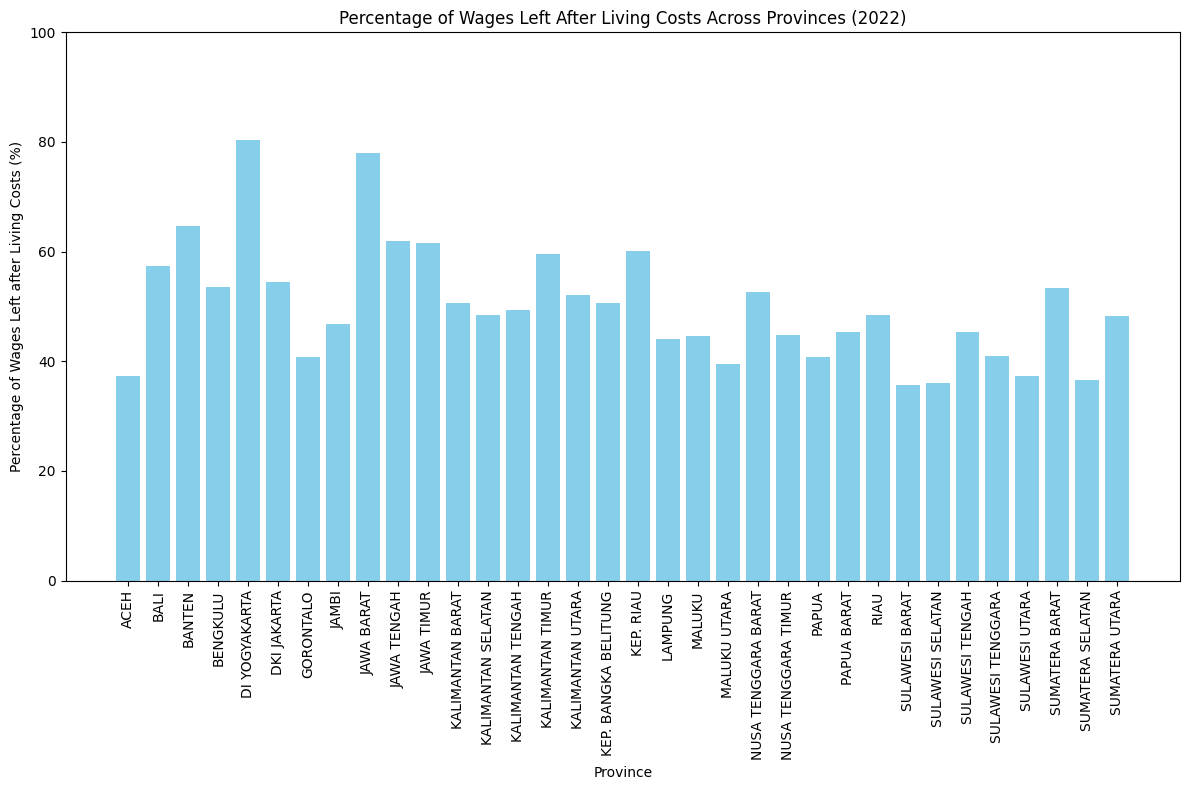

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
ump_df = pd.read_csv('ump_cleaned_fixed.csv')
peng_df = pd.read_csv('peng_cleaned.csv')

# Merge the datasets on 'provinsi' and 'year'
merged_df = pd.merge(ump_df, peng_df, on=['provinsi', 'year'])

# Calculate the disparity between UMP and Pengeluaran
merged_df['disparity'] = merged_df['ump'] - merged_df['pengeluaran']

# Filter the data for the years 2021 and 2022
years = [2021, 2022]
filtered_df = merged_df[merged_df['year'].isin(years)]

# Calculate the percentage of wages remaining after deducting living costs
filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100

# Group by 'provinsi' and 'year' and calculate the mean percentage of wages left
mean_wages_left = filtered_df.groupby(['provinsi', 'year'])['wages_left_percentage'].mean().reset_index()

# Plotting for 2021
plt.figure(figsize=(12, 8))
year_2021_data = mean_wages_left[mean_wages_left['year'] == 2021]
plt.bar(year_2021_data['provinsi'], year_2021_data['wages_left_percentage'], color='skyblue')
plt.xlabel('Province')
plt.ylabel('Percentage of Wages Left after Living Costs (%)')
plt.title('Percentage of Wages Left After Living Costs Across Provinces (2021)')
plt.xticks(rotation=90)
plt.ylim(0, 100)  # Set y-axis limit to reach 100
plt.tight_layout()
plt.show()

# Plotting for 2022
plt.figure(figsize=(12, 8))
year_2022_data = mean_wages_left[mean_wages_left['year'] == 2022]
plt.bar(year_2022_data['provinsi'], year_2022_data['wages_left_percentage'], color='skyblue')
plt.xlabel('Province')
plt.ylabel('Percentage of Wages Left after Living Costs (%)')
plt.title('Percentage of Wages Left After Living Costs Across Provinces (2022)')
plt.xticks(rotation=90)
plt.ylim(0, 100)  # Set y-axis limit to reach 100
plt.tight_layout()
plt.show()

This chart displays the percentage of wages remaining after deducting living costs for each province, covering the years 2021 and 2022.

The percentage represents the portion of the minimum wages (UMP) that individuals retain after covering essential living expenses.

A higher percentage suggests that a larger portion of wages is available for discretionary spending or savings, indicating better affordability and potentially higher standards of living. Conversely, a lower percentage indicates that a significant portion of wages is allocated towards covering living costs, potentially leading to financial strain or reduced purchasing power.

<ipython-input-20-6365378ef969>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100


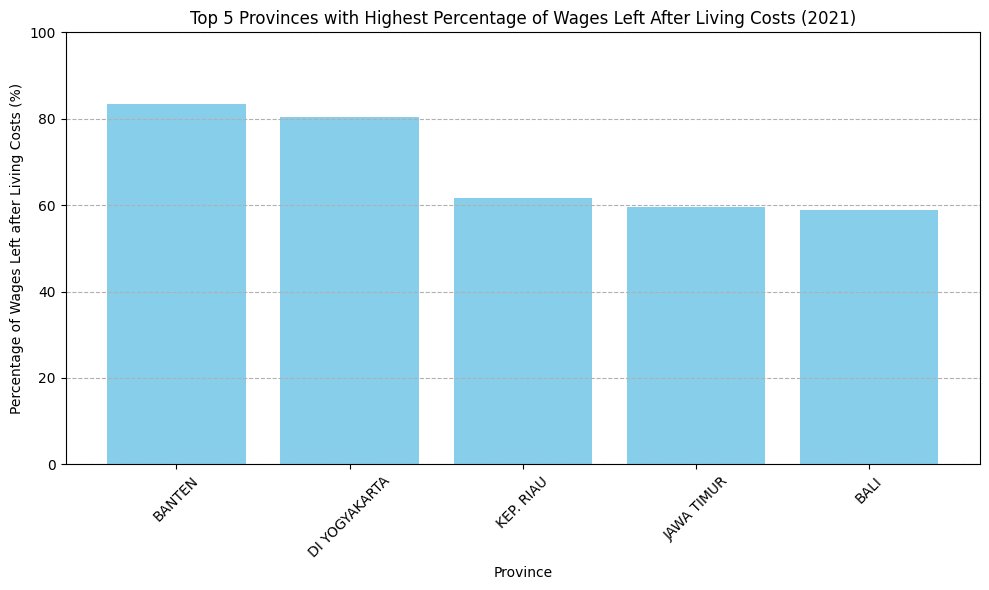

<ipython-input-20-6365378ef969>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100


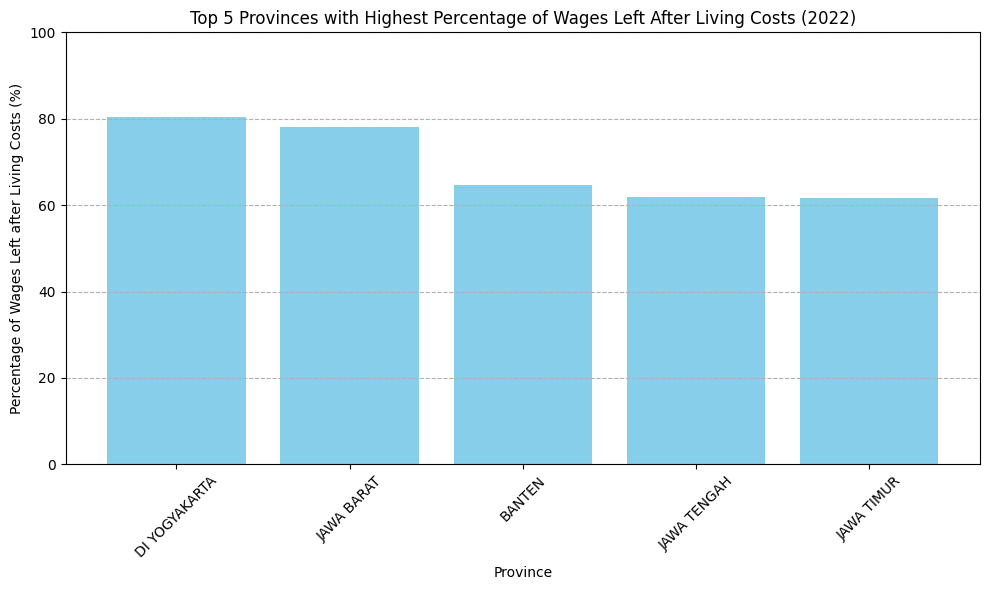

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
ump_df = pd.read_csv('ump_cleaned_fixed.csv')
peng_df = pd.read_csv('peng_cleaned.csv')

# Merge the datasets on 'provinsi' and 'year'
merged_df = pd.merge(ump_df, peng_df, on=['provinsi', 'year'])

# Calculate the disparity between UMP and Pengeluaran
merged_df['disparity'] = merged_df['ump'] - merged_df['pengeluaran']

# Filter the data for the years 2021 and 2022
years = [2021, 2022]
for year in years:
    filtered_df = merged_df[merged_df['year'] == year]

    # Calculate the percentage of wages remaining after deducting living costs
    filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100

    # Group by 'provinsi' and 'year' and calculate the mean percentage of wages left
    mean_wages_left = filtered_df.groupby(['provinsi', 'year'])['wages_left_percentage'].mean().reset_index()

    # Sort the mean_wages_left DataFrame by the wages_left_percentage in descending order
    sorted_df = mean_wages_left.sort_values(by='wages_left_percentage', ascending=False)

    # Get the top 5 provinces with the highest percentage of wages left after living costs
    top_5_highest = sorted_df.head(5)

    # Plotting for the top 5 provinces with the highest percentage of wages left after living costs
    plt.figure(figsize=(10, 6))
    plt.bar(top_5_highest['provinsi'], top_5_highest['wages_left_percentage'], color='skyblue')
    plt.xlabel('Province')
    plt.ylabel('Percentage of Wages Left after Living Costs (%)')
    plt.title(f'Top 5 Provinces with Highest Percentage of Wages Left After Living Costs ({year})')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)  # Set y-axis limit to reach 100
    plt.grid(axis='y', linestyle='--')  # Set the grid behind the bars
    plt.tight_layout()
    plt.show()


This chart showcases the top 5 provinces where the percentage of remaining wages after covering living costs is most favorable in the year 2021 and 2022.